In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 4
L = 0.001
EPOCH = 10
DEVICE = torch.cuda.is_available()
DEVICE

False

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [5]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

### 显示图片

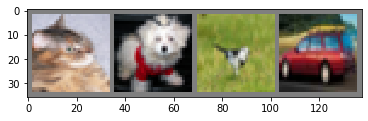

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
# print(' '.join('%5s' % classes[labels[j]] for j in range(BATCH_SIZE)))

### 定义卷积神经网络

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### 定义损失函数和优化器

In [5]:
import torch.optim as optim

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=L)

if DEVICE:
    net = net.cuda()

### 训练网络

In [6]:
for epoch in range(EPOCH):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        if DEVICE:
            inputs = inputs.cuda()
            labels = labels.cuda()
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 1.896
[1,  4000] loss: 1.606
[1,  6000] loss: 1.531
[1,  8000] loss: 1.467
[1, 10000] loss: 1.420
[1, 12000] loss: 1.396
[2,  2000] loss: 1.361
[2,  4000] loss: 1.317
[2,  6000] loss: 1.304
[2,  8000] loss: 1.286
[2, 10000] loss: 1.266
[2, 12000] loss: 1.273
[3,  2000] loss: 1.184
[3,  4000] loss: 1.192
[3,  6000] loss: 1.211
[3,  8000] loss: 1.192
[3, 10000] loss: 1.185
[3, 12000] loss: 1.168
[4,  2000] loss: 1.109
[4,  4000] loss: 1.120
[4,  6000] loss: 1.110
[4,  8000] loss: 1.119
[4, 10000] loss: 1.112
[4, 12000] loss: 1.128
[5,  2000] loss: 1.043
[5,  4000] loss: 1.052
[5,  6000] loss: 1.077
[5,  8000] loss: 1.055
[5, 10000] loss: 1.072
[5, 12000] loss: 1.085
[6,  2000] loss: 0.989
[6,  4000] loss: 1.018
[6,  6000] loss: 1.036
[6,  8000] loss: 1.024
[6, 10000] loss: 1.041
[6, 12000] loss: 1.051
[7,  2000] loss: 0.953
[7,  4000] loss: 0.971
[7,  6000] loss: 0.995
[7,  8000] loss: 1.011
[7, 10000] loss: 1.008
[7, 12000] loss: 0.999
[8,  2000] loss: 0.933
[8,  4000] 

RuntimeError: DataLoader worker (pid 38375) is killed by signal: Unknown signal: 0. 

### 保存模型

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### 测试数据展示

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(BATCH_SIZE)))

### 加载模型

In [ ]:
# net = Net()
# net.load_state_dict(torch.load(PATH))

In [ ]:
# outputs = net(images)
# print(('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'))
# print(outputs)

In [ ]:
# _, predicted = torch.max(outputs, 1)
# print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
#                               for j in range(4)))

In [ ]:
currect = 0
total = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

for data in testloader:
    images, labels = data
    if DEVICE:
        images = images.cuda()
        labels = labels.cuda()
    
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    currect += (predicted == labels).sum().item()
    
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * currect / total))
print('-------------------------------------------------------------')
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
        

In [ ]:
# class_correct = list(0. for i in range(10))
# class_total = list(0. for i in range(10))

# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = net(images)
#         _, predicted = torch.max(outputs, 1)
#         c = (predicted == labels).squeeze()
#         print(c)
#         for i in range(4):
#             label = labels[i]
#             class_correct[label] += c[i].item()
#             class_total[label] += 1

# for i in range(10):
#     print('Accuracy of %5s : %2d %%' % (
#         classes[i], 100 * class_correct[i] / class_total[i]))